# Problema de las componente electrónicas
Considere un sistema electrónico con dos componentes. Se observa el estado
del sistema cada hora. Una componente dada que opera en el tiempo $n$ tiene
probabilidad $p$ de fallar antes de la siguiente observación en el instante $n+1$. Una componente que se encontraba en un estado fallido en el tiempo $n$ tiene una probabilidad $r$ de ser reparado en el tiempo $n+1$,
independientemente de cuánto tiempo la componente ha estado en un estado
fallido. Los fallos de los componentes y las reparaciones son eventos
mutuamente independientes. Sea $X_{n}$ el número de componentes en
funcionamiento en el tiempo $n$.


- **a)** Defina un espacio de estados adecuados para el proceso Markoviano 
$\left( X_{n} \right)_{n \in \mathbb{N}}$ y explique por qué es una CMH.

- **b)** Determine la matriz de transición $P = \left( p_{ij} \right)_{i,j\in E}$ de la CMH e ilustre el grafo asociado.

- **c)** Suponga que el sistema comienza a operar cuando las dos componentes se encuentran funcionando. Calcule la probabilidad que en 2 horas, el sistema deje de funcionar (asumiendo que el sistema deja de funcionar cuando ninguna componente se encuentra operando).


In [29]:
from IPython.display import display, Markdown
import sympy as sym
p, r = sym.symbols('p r')

En clases vimos que la matriz de prabilidades de transición es la siguiente:
$$
P = \begin{pmatrix}
(1-r)^2 & 2r(1-r) & r^2 \\
p(1-r) & p r + (1-p)(1-r) & r(1-p) \\
p^2 & 2p(1-p) & (1-p)^2
\end{pmatrix}
$$
Obtenemos:

Prodríamos ilustrar el grafo asociado, usando la librería [Tikz](https://tikz.net) de Latex. Primero asegurate de tener instalado itikz (Usa el siguiente comando en la terminal de Anaconda prompt: pip install itikz)

In [30]:
# Definimos las matriz de transición P:
P = sym.Matrix([
    [(1-r)**2, 2*r*(1-r), r**2],
    [p*(1-r), p*r + (1-p)*(1-r), r*(1-p)],
    [p**2, 2*p*(1-p), (1-p)**2]
])

In [36]:
%load_ext itikz

The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


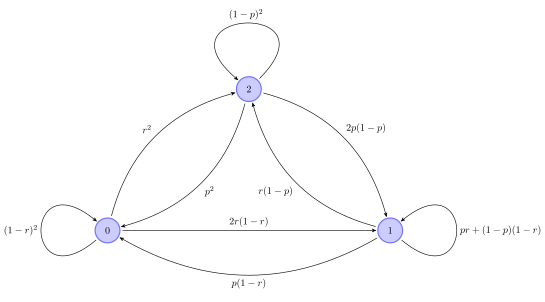

In [37]:
%%itikz
\documentclass[tikz]{standalone}
\usetikzlibrary{automata, positioning, arrows}
\tikzset{
	->,  % makes the edges directed
	>=stealth, % makes the arrow heads bold
	shorten >=2pt, shorten <=2pt, % shorten the arrow
	node distance=3cm, % specifies the minimum distance between two nodes. Change if n
	every state/.style={draw=blue!55,very thick,fill=blue!20}, % sets the properties for each ’state’ n
	initial text=$ $, % sets the text that appears on the start arrow
 }

\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.5cm,
                    semithick]

  % Definición de los nodos
  \node[state] (A)    at (0,0)              {$0$};
  \node[state] (B)    at (10,0)             {$1$};
  \node[state] (C)    at (5,5)              {$2$};

  % Definición de las aristas
  \path (A) edge [loop left, in=140, out=220, looseness=15]  node {$(1-r)^2$} (A)
            edge              node {$2r(1-r)$} (B)
            edge [bend left]  node {$r^2$} (C)
        (B) edge [loop right, in=40, out=-40, looseness=15] node {$pr + (1-p)(1-r)$} (B)
            edge [bend left]  node {$r(1-p)$} (C)
            edge [bend left]  node {$p(1-r)$} (A)
        (C) edge [loop above, in=140, out=45, looseness=15] node {$(1-p)^2$} (C)
            edge [bend left]  node {$2p(1-p)$} (B)
            edge [bend left]  node {$p^2$} (A);
\end{tikzpicture}
\end{document}


Necesitamos calcular $ \mathbb{P}(X_{2} = 0 | X_0 = 2)$. Ahora bien:
$ \mathbb{P}(X_{2} = 0 | X_0 = 2) = P_{2,0}^{(2)} = (P^2)_{2,0} = P_{2,:} \cdot P_{:,0}$. Así:

In [35]:
display(Markdown(f"""$P(X_{2} = 0 | X_0 = 2) = {sym.latex(P[2,:]*P[:,0])} $ """))

$P(X_2 = 0 | X_0 = 2) = \left[\begin{matrix}p^{2} \left(1 - p\right)^{2} + 2 p^{2} \cdot \left(1 - p\right) \left(1 - r\right) + p^{2} \left(1 - r\right)^{2}\end{matrix}\right] $ 